# Rechenaufgaben zu 5.1 (Künstliche Neuronale Netzwerke)

---

## Rechenaufgabe

Gegeben sei das folgende neuronale Netzwerk.

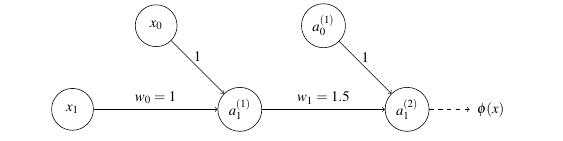


Außerdem seien folgende Werte gegeben:

- $x_1=0.1$
- $x_0=0.2$
- $a^{(1)}_0=0.05$

Der gewünschte Ausgabewert bei der gegebenen Eingabe ist $y=0.3$.

**Aufgaben:**

Führen Sie eine Iteration des Backpropagation-Algorithmus durch, indem Sie die folgenden Schritte ausführen.

Verwenden Sie als Aktivierungsfunktion ReLU und als Lernrate $\gamma=0.1$.

1. Führen Sie den Forward-Pass durch. Wie lautet der Ausgabewert $\phi(x)$
2. Berechnen Sie den Wert $\operatorname{cost}(y,a^{(2)}_1)$, wobei $\operatorname{cost}$ die logistische Kostenfunktion sei.
3. Berechnen Sie den Fehler für $a^{(2)}_1$
4. Berechnen Sie das aktualisierte Gewicht $w^\text{neu}_1$
5. Berechnen Sie den Fehler für $a^{(1)}_{1}$
6. Berechnen Sie das aktualisierte Gewicht $w^\text{neu}_0$
7. Führen Sie nochmal einen Forward-Pass durch. Wie lautet der neue Ausgabewert $\phi(x)$


In [92]:
x_0 = 0.2
x_1 = 0.1
a_1_0 = 0.05

w_0 = 1
w_1 = 1.5

learning_rate = 0.1


def relu(x):
    return max(0, x)


# forward pass

## layer 1
z_1_1 = (w_0 * x_1) + (1 * x_0)
a_1_1 = relu(z_1_1)

## layer 2
z_2_1 = (w_1 * a_1_1) + (1 * a_1_0)
a_2_1 = relu(z_2_1)

print(f"1.) phi(x)={a_2_1:0.3f}")

1.) phi(x)=0.500


In [ ]:
from math import log


def logistic_cost(y, y_hat):
    return -(y * log(y_hat) + (1 - y) * log(1 - y_hat))


cost_iteration_0 = logistic_cost(0.3, a_2_1)
print(f"2.) cost(y, a^(2)_1) = {cost_iteration_0:0.3f}")

2.) cost(y, a^(2)_1) = 0.693


In [126]:
def relu_derivative(x):
    if x > 0:
        return 1
    if x < 0:
        return 0
    else:
        return float("NaN")


def derivative_of_cost_wrt_z(y, z):
    """
    Wir bilden die Ableitung
    \partial -(y * log(relu(z)) + (1 - y) * log(1 - relu(z))) / \partial z

    Mit Hilfe der Faktorregel, der Ableitung log'(x)=1/x und der Kettenregel erhalten wir:
    """
    return -((y / relu(z)) - (1 - y) / (1 - relu(z))) * relu_derivative(z)


delta_z_2_1 = derivative_of_cost_wrt_z(0.3, z_2_1)

print(f"3.) delta(z^(2)_1) = {delta_z_2_1:0.3f}")

3.) delta(z^(2)_1) = 0.800


In [ ]:
derivative_wrt_w_1 = delta_z_2_1 * a_1_1
w_1_neu = w_1 - learning_rate * derivative_wrt_w_1

print(f"4.) w^(neu)_1 = {w_1_neu}")

4.) w^(neu)_1 = 1.476


In [ ]:
delta_a_1_1 = relu_derivative(z_1_1) * w_1 * delta_z_2_1
print(f"5.) delta(z^(1)_1) = {delta_a_1_1:0.3f}")

5.) delta(z^(1)_1) = 1.200


In [114]:
derivative_wrt_w_0 = delta_a_1_1 * x_1
w_0_neu = w_0 - learning_rate * derivative_wrt_w_0

print(f"6.) w^(neu)_0 = {w_0_neu:0.3f}")

6.) w^(neu)_0 = 0.988


In [115]:
# forward pass

## layer 1
z_1_1_neu = (w_0_neu * x_1) + (1 * x_0)
a_1_1_neu = relu(z_1_1_neu)

## layer 2
z_2_1_neu = (w_1_neu * a_1_1_neu) + (1 * a_1_0)
a_2_1_neu = relu(z_2_1_neu)

print(f"7.) phi(x)={a_2_1_neu:0.3f}")

7.) phi(x)=0.491
